## Model


# Import packages

In [86]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error, make_scorer

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
#Import already cleaned data and verify its columns with .head.
data = pd.read_csv('data2.csv')
data.head()

,Unnamed: 0,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,bathrooms,view_1,view_2,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,221900.0,1180.0,5650.0,1180.0,1340.0,5650.0,1.00,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,538000.0,2570.0,7242.0,2170.0,1690.0,7639.0,2.25,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,180000.0,770.0,10000.0,770.0,2720.0,8062.0,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,1960.0,5000.0,1050.0,1360.0,5000.0,3.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,510000.0,1680.0,8080.0,1680.0,1800.0,7503.0,2.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#create a list with all the columns.
data.columns.to_list()

['Unnamed: 0',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_3',
 'condition_4',
 'condition_5',
 'floor_1',
 'floor_1_5',
 'floor_2',
 'floor_2_5',
 'renovated',
 'waterfront',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'basement',
 'bedroom_1',
 'bedroom_2',
 'bedroom_3',
 'bedroom_4',
 'bedroom_5',
 'bedroom_6',
 'zip_98001',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',

# Run 1st linear model with Price as the target variable in statsmodels

The model performance are located at the top table - R-square and adjusted R-squared.
The model significance information is located at the top table - F-statistics and p-Value
The explanatory of each variables information is located in the middle table - from bedrooms to zipcode.
The model bias information is located at the bottom of the table - Jarque-Bera (JB) and Durbin-Watson.

An Adjusted R-Squared value of 0.65 would indicate that the current model (the explanatory variables modeled using linear regression) explains approximately 65 percent of the variation in the dependent variable. Said another way, the current model explain approximately 65 percent of the house price.

In [90]:
X = data.drop('price', axis=1)
y = data['price']

In [91]:

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     956.0
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:45:01   Log-Likelihood:            -2.4099e+05
No. Observations:               18735   AIC:                         4.822e+05
Df Residuals:                   18635   BIC:                         4.830e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.034e+05   6218.849     16.623      0.000    9.12e+04    1.16e+05
Unnamed: 0        0.0451      0.114      0.396      0.692      -0.178       0.268
sqft_living      75.5299      3.508     21.531      0.000      68.654      82.406
sqft_lot          1.1412      0.114     10.023      0.000       0.918       1.364
sqft_above       42.7475      3.986     10.723      0.000      34.934      50.561
sqft_living15    26.8813      2.068     12.996      0.000      22.827      30.936
sqft_lot15       -0.7035      0.169     -4.151      0.000      -1.036      -0.371
bathrooms      1.352e+04   1734.057      7.797      0.000    1.01e+04    1.69e+04
view_1         6.944e+04   5861.190     11.848      0.000     5.8e+04    8.09e+04
view_2         7.051e+04   3701.810     19.048      0.000    6.33e+04    7.78e+04
view_3         1.294e+05   5435.619     23.809      0.000    1.19e+05     1.4e+05
view_4         2.261e+05   8748.938     25.840      0.000    2.09e+05    2.43e+05
condition_3    1.987e+04   7923.209      2.507      0.012    4336.265    3.54e+04
condition_4    4.359e+04   7971.258      5.468      0.000     2.8e+04    5.92e+04
condition_5    8.336e+04   8239.293     10.118      0.000    6.72e+04    9.95e+04
floor_1        3.178e+04   2691.812     11.807      0.000    2.65e+04    3.71e+04
floor_1_5      3.778e+04   3100.950     12.183      0.000    3.17e+04    4.39e+04
floor_2        1.329e+04   2880.166      4.613      0.000    7640.335    1.89e+04
floor_2_5      2.053e+04   7448.952      2.756      0.006    5927.597    3.51e+04
renovated      5.477e+04   3946.169     13.878      0.000     4.7e+04    6.25e+04
waterfront     2.017e+05   1.49e+04     13.508      0.000    1.72e+05    2.31e+05
gr_5          -5.221e+04   5850.324     -8.925      0.000   -6.37e+04   -4.07e+04
gr_6          -4.879e+04   2624.362    -18.589      0.000   -5.39e+04   -4.36e+04
gr_7          -3.489e+04   1902.074    -18.341      0.000   -3.86e+04   -3.12e+04
gr_8           4399.2134   2137.891      2.058      0.040     208.753    8589.674
gr_9           8.243e+04   2989.938     27.568      0.000    7.66e+04    8.83e+04
gr_10          1.524e+05   4368.222     34.896      0.000    1.44e+05    1.61e+05
basement       2943.4008   2809.329      1.048      0.295   -2563.141    8449.943
bedroom_1      9682.0173   6641.048      1.458      0.145   -3335.044    2.27e+04
bedroom_2      1.906e+04   2601.134      7.326      0.000     1.4e+04    2.42e+04
bedroom_3      2.804e+04   2126.942     13.185      0.000    2.39e+04    3.22e+04
bedroom_4      2.419e+04   2354.289     10.273      0.000    1.96e+04    2.88e+04
bedroom_5      1.478e+04   3254.560      4.540      0.000    8396.595    2.12e+04
bedroom_6      7629.7978   6270.965      1.217      0.224   -4661.866    1.99e+04
zip_98001     -1.927e+05   5077.699    -37.943   

MODEL PERFORMANCE¶
Both the Multiple R-Squared and Adjusted R-Squared values are measures of model performance. Possible values range from 0.0 to 1.0. The Adjusted R-Squared value is always a bit lower than the Multiple R-Squared value, because it reflects model complexity (the number of variables) as it relates to the data and is consequently a more accurate measure of model performance. Adding an additional explanatory variable to the model will likely increase the Multiple R-Squared value but may decrease the Adjusted R-Squared value.

An Adjusted R-Squared value of 0.65 would indicate that the current model (the explanatory variables modeled using linear regression) explains approximately 65 percent of the variation in the dependent variable. Said another way, the current model explain approximately 65 percent of the house price.

MODEL SIGNIFICANCE
The F-test sums the predictive power of all independent variables and determines that it is unlikely that all of the coefficients equal zero. However, it is possible that each variable is not predictive enough on its own to be statistically significant. In other words, the sample provides sufficient evidence to conclude that the current model is significant, but not enough to conclude that any individual variable is significant. This finding is good news because it is sufficiently high.

EXPLANATORY POWER OF INDEPENDENT VARIABLES
The p-value for all independent variables is less than the significance level, which means that the current independent variables provide sufficient evidence to conclude that the regression model fits the data better than the model with no independent variables. This finding is good news because it means that the independent variables in the current model improve the fit.

A read of the coefficient column shows three variables are negatively related with house sale price i.e.

Number of bedrooms - this seems counter-intuitive because typically a higher number of bedrooms means more space for family. Perhaps the number of bedrooms increase has a positive benefits to homebuyer up to a certain threshold i.e. why do I want more than 6 bedrooms if I have only 2 children.
Year built - it looks like homebuyers in King County value newer houses.
Zipcode - we can ignore this because it is no relevant.
MODEL BIAS
The Jarque-Bera (JB) statistic indicates whether or not the residuals (i.e. the known dependent variable values minus the predicted values) are normally distributed. Put simply, it is a test to confirm normality.

When the p-value (probability) for this test is small (smaller than 0.05 for a 95 percent confidence level, for example), the residuals are not normally distributed, indicating the current model is biased. In general, a large JB value, in this current model, indicates that errors are not normally distributed.

The Durbin Watson statistic is a number that tests for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic is always between 0 and 4. The current model has a value of 2 means that there is no autocorrelation in the sample.

MODEL SYMMETRY
Skewness implies off-centre (i.e. it means lack of symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. In this current model, it is greater than 1, indicated a highly skewed distribution.

Kurtosis refers to the pointedness of a peak in the distribution curve. The value is often compared to the kurtosis of the normal distribution, which is equal to 3. If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails). In this current model, the value is greater than 3, indicated a dataset has heavier tails than normal distribution.

Our R-squared is 0.83. Let's try to normalize our continuous values even further with logarithms.

Let's check how close to normal are our continuous data columns.

In [92]:
#Separate in 2 lists: one for continuous columns and one for categorical columns.
continuous = ['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',]
categoricals = [ 
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_3',
 'condition_4',
 'condition_5',
 'floor_1',
 'floor_1_5',
 'floor_2',
 'floor_2_5',
 'renovated',
 'waterfront',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'basement',
 'bedroom_1',
 'bedroom_2',
 'bedroom_3',
 'bedroom_4',
 'bedroom_5',
 'bedroom_6',
 'zip_98001',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199']

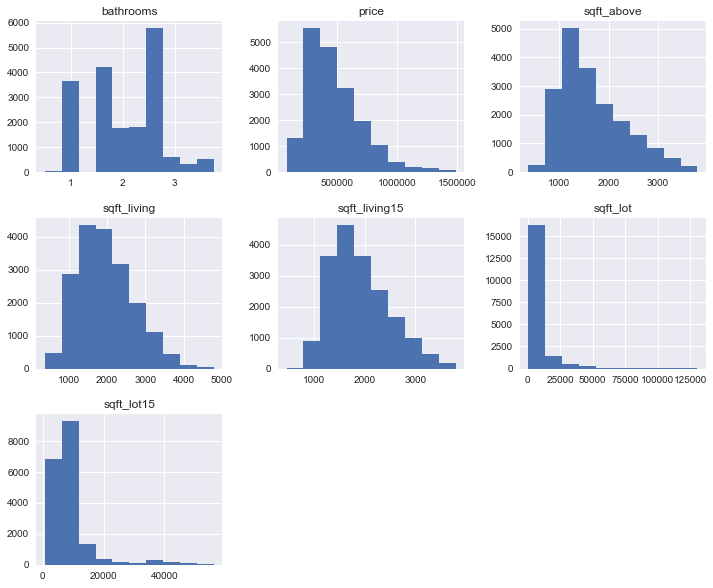

In [93]:
data_cont = data[continuous]
data_cont.hist(figsize=(12,10));

In [62]:
# Log transform and normalize

# log features
data_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = data_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

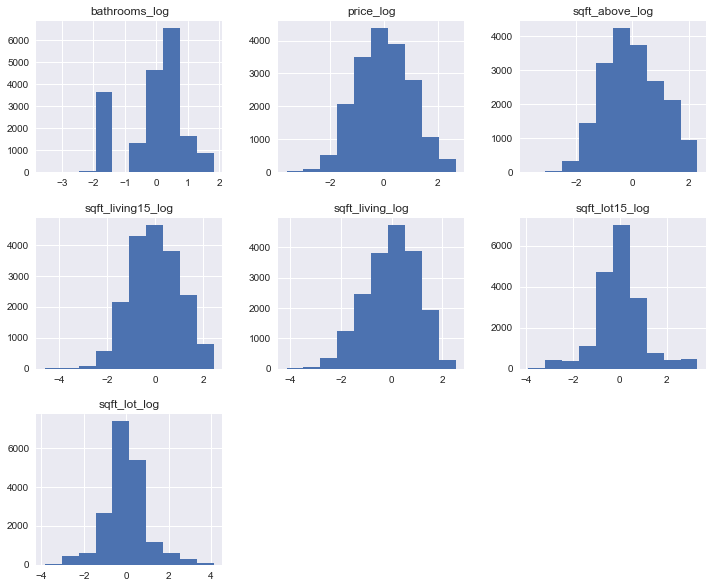

In [63]:
#Check normalization after applying log.
data_log_norm.hist(figsize=(12,10));

All but bathroom column seems more or less normal.

In [94]:
data_ohe = data[categoricals]

In [65]:
#Create a new data frame with our categorical columns and replace the continuous values with their log.
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
preprocessed.head()

,price_log,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log,bathrooms_log,view_1,view_2,view_3,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,-1.449182,-1.122302,-0.395968,-0.698166,-1.026332,-0.406035,-1.699163,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.467933,0.902761,-0.037679,0.869646,-0.253426,0.082004,0.463854,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.902186,-2.232871,0.428058,-1.796742,1.331642,0.169212,-1.699163,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.718422,0.197827,-0.572366,-0.998557,-0.976989,-0.603797,1.231197,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.352236,-0.203211,0.120355,0.211000,-0.043401,0.052937,0.149688,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's see if our model improves after log normalization.

# Run 2nd linear model with price_log as the target variable in statsmodels

In [66]:
#Take the price column and set it as y axis and 
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [67]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1193.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:17:25   Log-Likelihood:                -7993.9
No. Observations:               18735   AIC:                         1.619e+04
Df Residuals:                   18636   BIC:                         1.696e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2186      0.021    -10.368      0.000      -0.260      -0.177
sqft_living_log       0.1930      0.011     17.361      0.000       0.171       0.215
sqft_lot_log          0.1003      0.007     15.323      0.000       0.087       0.113
sqft_above_log        0.1485      0.011     13.199      0.000       0.126       0.171
sqft_living15_log     0.1013      0.005     21.859      0.000       0.092       0.110
sqft_lot15_log       -0.0313      0.007     -4.750      0.000      -0.044      -0.018
bathrooms_log         0.0400      0.005      8.481      0.000       0.031       0.049
view_1                0.2300      0.023      9.893      0.000       0.184       0.276
view_2                0.2416      0.015     16.470      0.000       0.213       0.270
view_3                0.3798      0.021     17.669      0.000       0.338       0.422
view_4                0.6020      0.035     17.392      0.000       0.534       0.670
condition_3           0.2883      0.031      9.157      0.000       0.227       0.350
condition_4           0.3796      0.032     11.989      0.000       0.318       0.442
condition_5           0.5257      0.033     16.055      0.000       0.461       0.590
floor_1              -0.0470      0.011     -4.295      0.000      -0.068      -0.026
floor_1_5            -0.0280      0.012     -2.295      0.022      -0.052      -0.004
floor_2              -0.0623      0.011     -5.919      0.000      -0.083      -0.042
floor_2_5            -0.0814      0.029     -2.781      0.005      -0.139      -0.024
renovated             0.1614      0.016     10.289      0.000       0.131       0.192
waterfront            0.8341      0.059     14.078      0.000       0.718       0.950
gr_5                 -0.4681      0.024    -19.664      0.000      -0.515      -0.421
gr_6                 -0.3024      0.011    -27.320      0.000      -0.324      -0.281
gr_7                 -0.1527      0.008    -19.989      0.000      -0.168      -0.138
gr_8                  0.0302      0.008      3.711      0.000       0.014       0.046
gr_9                  0.2669      0.011     24.424      0.000       0.246       0.288
gr_10                 0.4074      0.016     25.427      0.000       0.376       0.439
basement              0.0600      0.012      4.923      0.000       0.036       0.084
bedroom_1             0.0230      0.027      0.854      0.393      -0.030       0.076
bedroom_2             0.0004      0.011      0.035      0.972      -0.021       0.021
bedroom_3            -0.0361      0.008     -4.349      0.000      -0.052      -0.020
bedroom_4            -0.0324      0.009     -3.633      0.000      -0.050      -0.015
bedroom_5            -0.0728      0.012     -5.900      0.000      -0.097      -0.049
bedroom_6            -0.1006      0.025     -4.105      0.000      -0.149

In [68]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# coefficients
linreg.coef_

array([ 1.93000639e-01,  1.00302704e-01,  1.48513526e-01,  1.01308042e-01,
       -3.13572518e-02,  4.00369346e-02,  2.30051744e-01,  2.41593153e-01,
        3.79871206e-01,  6.02069979e-01,  2.88182609e-01,  3.79551262e-01,
        5.25655088e-01, -6.63764370e+10, -6.63764370e+10, -6.63764370e+10,
       -6.63764370e+10,  1.61377799e-01,  8.34272647e-01,  6.18102744e+09,
        6.18102744e+09,  6.18102744e+09,  6.18102744e+09,  6.18102744e+09,
        6.18102744e+09,  6.00331341e-02,  1.47318398e+10,  1.47318398e+10,
        1.47318398e+10,  1.47318398e+10,  1.47318398e+10,  1.47318398e+10,
        7.86023659e+08,  7.86023659e+08,  7.86023659e+08,  7.86023661e+08,
        7.86023660e+08,  7.86023660e+08,  7.86023660e+08,  7.86023660e+08,
        7.86023659e+08,  7.86023660e+08,  7.86023660e+08,  7.86023659e+08,
        7.86023659e+08,  7.86023659e+08,  7.86023660e+08,  7.86023660e+08,
        7.86023660e+08,  7.86023660e+08,  7.86023659e+08,  7.86023659e+08,
        7.86023659e+08,  

# Run 3rd linear model with Price_log as the target variable in statsmodels after we chose the best feature based on p-values.

In [70]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [71]:
outcome = 'price_log'
predictors = preprocessed.drop('price_log', axis=1)

In [72]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [73]:
result = stepwise_selection(predictors, preprocessed['price_log'], verbose=True)
print('resulting features:')
print(result)

Add  floor_1                        with p-value 0.0
Add  basement                       with p-value 0.0
Add  sqft_above_log                 with p-value 0.0
Add  sqft_living15_log              with p-value 1.7636e-261
Add  zip_98023                      with p-value 2.16349e-206
Add  zip_98042                      with p-value 1.07879e-155
Add  zip_98001                      with p-value 1.79123e-155
Add  zip_98038                      with p-value 2.99196e-141
Add  zip_98092                      with p-value 4.97249e-154
Add  zip_98003                      with p-value 3.00182e-131
Add  zip_98030                      with p-value 6.63731e-136
Add  zip_98058                      with p-value 1.85029e-137
Add  zip_98031                      with p-value 5.58559e-145
Add  zip_98168                      with p-value 2.00285e-144
Add  zip_98002                      with p-value 7.4377e-148
Add  zip_98198                      with p-value 3.341e-147
Add  zip_98055                      wit

In [74]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1343.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:20:58   Log-Likelihood:                -8005.9
No. Observations:               18735   AIC:                         1.619e+04
Df Residuals:                   18647   BIC:                         1.688e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3888      0.034    -11.422      0.000      -0.455      -0.322
basement              0.0613      0.012      5.045      0.000       0.037       0.085
sqft_above_log        0.1453      0.011     13.770      0.000       0.125       0.166
sqft_living15_log     0.1017      0.005     22.147      0.000       0.093       0.111
zip_98023            -0.9883      0.020    -49.324      0.000      -1.028      -0.949
zip_98042            -0.8150      0.019    -41.807      0.000      -0.853      -0.777
zip_98001            -0.9439      0.023    -41.833      0.000      -0.988      -0.900
zip_98038            -0.5985      0.020    -30.539      0.000      -0.637      -0.560
zip_98092            -0.9328      0.024    -38.584      0.000      -0.980      -0.885
zip_98003            -0.8862      0.025    -35.310      0.000      -0.935      -0.837
zip_98030            -0.8373      0.026    -32.269      0.000      -0.888      -0.786
zip_98058            -0.5853      0.021    -28.108      0.000      -0.626      -0.545
zip_98031            -0.7771      0.025    -30.699      0.000      -0.827      -0.728
zip_98168            -0.7292      0.026    -28.288      0.000      -0.780      -0.679
zip_98002            -0.9461      0.029    -32.676      0.000      -1.003      -0.889
zip_98198            -0.7810      0.025    -30.890      0.000      -0.831      -0.731
zip_98055            -0.6196      0.026    -24.238      0.000      -0.670      -0.569
zip_98004             1.4165      0.029     49.130      0.000       1.360       1.473
zip_98022            -0.8945      0.030    -29.636      0.000      -0.954      -0.835
zip_98178            -0.5760      0.026    -22.230      0.000      -0.627      -0.525
zip_98032            -0.9667      0.035    -27.250      0.000      -1.036      -0.897
zip_98059            -0.2393      0.021    -11.279      0.000      -0.281      -0.198
zip_98103             1.0297      0.022     47.343      0.000       0.987       1.072
zip_98117             0.9331      0.021     45.326      0.000       0.893       0.973
zip_98115             0.8978      0.020     45.107      0.000       0.859       0.937
zip_98112             1.2853      0.030     43.328      0.000       1.227       1.343
zip_98188            -0.7009      0.035    -20.212      0.000      -0.769      -0.633
zip_98199             0.9655      0.025     38.322      0.000       0.916       1.015
zip_98105             1.1546      0.030     39.071      0.000       1.097       1.212
zip_98119             1.2412      0.034     37.018      0.000       1.175       1.307
zip_98040             0.9748      0.029     33.414      0.000       0.918       1.032
view_4                0.6018      0.035     17.396      0.000       0.534       0.670
zip_98033             0.7407      0.022     33.917      0.000       0.698

Our R-squared dropped from 0.863 to 0.862.

# Regression Model Validation
# Train split

In [75]:
# Perform train_test_split with sklearn.model_selection
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [76]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

14988 3747 14988 3747


In [77]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Look at the residuals and calculate the MSE for training and test sets:

In [78]:
# Find mean_squared_error with sklearn.metrics

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.13665599109778936
Test Mean Squarred Error: 0.1416064813008251


There does not seem to be a big difference between the train and test MSE!

# K-Fold Cross Validation

Let's perform 10-fold cross-validation to get the mean squared error through scikit-learn. Let's have a look at the six individual MSEs.

In [79]:

#Find cross_val_score with klearn.model_selection
mse = make_scorer(mean_squared_error)

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)

In [80]:
cv_10_results.mean()

0.13982918464853034

Our train mean squared error is 0.138 and our mean squared error is 0.140. 

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

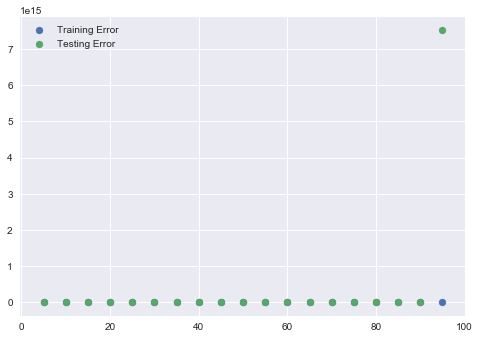

In [81]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [82]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [83]:
# Use same random state to compare - Only need one set of training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [84]:
linreg = LinearRegression()
cv_10_results = np.mean(cross_val_score(linreg, X_train, np.log(y_train), cv=10, scoring="r2"))
# Compare with old scores
cv_10_results/cv_10_results_1

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:

linreg.fit(X_train, np.log(y_train))
y_hat_train = np.exp(linreg.predict(X_train))
y_hat_test = np.exp(linreg.predict(X_test))

In [ ]:
:
# Selected Features True Data Scores:
print(r2_score(y_train, y_hat_train))
print(r2_score(y_test, y_hat_test))

In [ ]:
:
# Compare to old scores
print(r2_score(y_train, y_hat_train) - r2_score(y1_train, y1_hat_train))
print(r2_score(y_test, y_hat_test) - r2_score(y1_test, y1_hat_test))

In [ ]:
# Compare test scores:
print('-- Performance Increase from Raw Model to Final Model --\n')
print("Raw increase in R2:", r2_score(y_test, y_hat_test) - r2_score(y2_test, y2_hat_test))
print("Percentage improvement:", 100*(r2_score(y_test, y_hat_test) / r2_score(y2_test, y2_hat_test) - 1), '%')

In [ ]:
# Visualize predicted vs. actual test price
vis = y_test.copy()
vis['predicted'] = np.round(y_hat_test)
vis['price - predicted'] = np.round(vis['price'] - vis['predicted'])
vis['price / predicted'] = np.round(vis['price'] / vis['predicted'], 3)
vis.head(10)

In [ ]:
# Visualize predicted vs. actual test price
vis = y_test.copy()
vis['predicted'] = np.round(y_hat_test)
vis['price - predicted'] = np.round(vis['price'] - vis['predicted'])
vis['price / predicted'] = np.round(vis['price'] / vis['predicted'], 3)
vis.head(10)

In [ ]:
vis = y_test.copy()
vis['predicted'] = np.round(y_hat_test)
vis['price - predicted'] = np.round(vis['price'] - vis['predicted'])
vis['price / predicted'] = np.round(vis['price'] / vis['predicted'], 3)
vis.head(10)

# Build a final polynomial model

In [ ]:
# domgross is the outcome variable
X = df[['budget', 'imdbRating', 'Metascore', 'imdbVotes']]
y = df['domgross']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Scale the test set
X_test_scaled = scaler.transform(X_test)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

In [ ]:
# Training set predictions
lm_train_predictions = linreg.predict(X_train_scaled)

# Test set predictions 
lm_test_predictions = linreg.predict(X_test_scaled)

In [ ]:
 Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

In [ ]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();